# Bài tập 1 (Data Analysis)

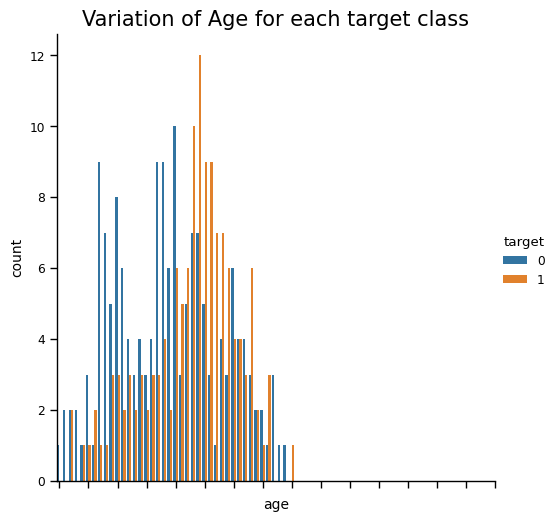

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Bai tap 1
df = pd.read_csv ('cleveland.csv', header = None )
df.columns =['age', 'sex', 'cp', 'trestbps', 'chol',
            'fbs', 'restecg', 'thalach', 'exang',
            'oldpeak', 'slope', 'ca', 'thal', 'target']
df ['target'] = df.target.map({0:0 , 1:1 , 2:1 , 3:1 , 4:1})
df ['thal'] = df.thal.fillna(df.thal.mean())
df ['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age

sns.set_context("paper", font_scale=1, rc = {"font.size": 3, "axes.titlesize":15, "axes.labelsize" : 10})
ax = sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
ax.set(xticklabels=[])
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for each target class')

plt.show()

# Bài tập 2 (Data Analysis)

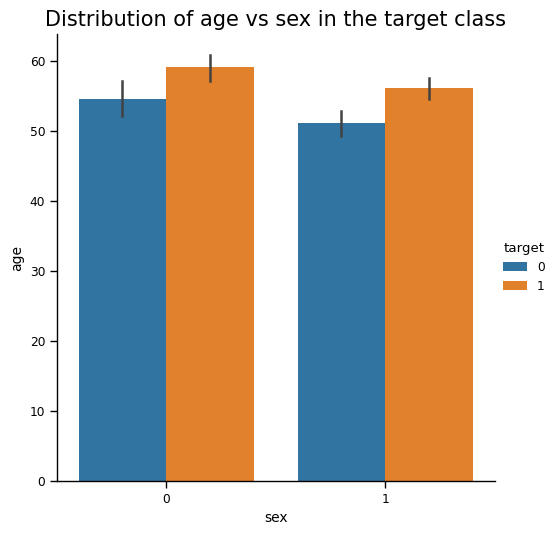

In [9]:
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex in the target class')
plt.show()

# Bài tập 3 (Sử dụng KNN)

In [12]:
X = df . iloc [:,:-1].values
y = df.iloc[: ,-1].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

# your code here ***************************
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p =2, metric = 'minkowski')

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np . round ((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round ((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train ) )
print('Accuracy for test set for KNeighborsClassifier = {}'. format (accuracy_for_test ))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


# Bài tập 4 (Sử dụng SVM)

In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[: ,-1].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

# Your code goes here
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np . round ((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round ((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train ) )
print('Accuracy for test set for SVM = {}'. format (accuracy_for_test ))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


# Bài tập 5 (Sử dụng Naive Bayes)

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[: ,-1].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

# Your code goes here
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np . round ((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round ((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train ) )
print('Accuracy for test set for Naive Bayes = {}'. format (accuracy_for_test ))


Accuracy for training set for SVM = 0.85
Accuracy for test set for SVM = 0.84


# Bài tập 6 (Sử dụng Decision Tree)

In [15]:
X = df.iloc[:,:-1].values
y = df.iloc[: ,-1].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

# Your code goes here
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 2, random_state = 42)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np . round ((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round ((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train ) )
print('Accuracy for test set for Decision Tree = {}'. format (accuracy_for_test ))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


# Bài tập 7 (Sử dụng Random Forest)

In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[: ,-1].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

# Your code goes here
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 2, n_estimators = 10, random_state = 42)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np . round ((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round ((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train ) )
print('Accuracy for test set for Random Forest = {}'. format (accuracy_for_test ))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


# Bài tập 8 (Sử dụng Ada Boost)

In [17]:
X = df.iloc[:,:-1].values
y = df.iloc[: ,-1].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

# Your code goes here
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators = 50, learning_rate=1.0, random_state = 42)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np . round ((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round ((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train ) )
print('Accuracy for test set for AdaBoostClassifier = {}'. format (accuracy_for_test ))

c:\Users\Admin\anaconda3\envs\AIO_excercise\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for test set for AdaBoostClassifier = 0.84


# Bài tập 9 (Sử dụng Gradient Descent)

In [18]:
X = df.iloc[:,:-1].values
y = df.iloc[: ,-1].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

# Your code goes here
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators = 50, learning_rate=1.0, subsample=1.0, min_samples_split=2, max_depth=3, random_state = 42)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np . round ((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round ((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train ) )
print('Accuracy for test set for GradientBoostingClassifier = {}'. format (accuracy_for_test ))


Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.84


# Bài tập 10 (Sử dụng XGBoost)

In [19]:
X = df.iloc[:,:-1].values
y = df.iloc[: ,-1].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

# Your code goes here
from xgboost import XGBClassifier
xg= XGBClassifier(objective="binary:logistic", random_state = 42, n_estimators = 100)
xg.fit(X_train, y_train)

#Predicting the Test set results
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np . round ((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round ((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train ) )
print('Accuracy for test set for XGBClassifier = {}'. format (accuracy_for_test ))


Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifierr = 0.87


# Bài tập 11 (Sử dụng stacking)

In [21]:
X = df.iloc[:,:-1].values
y = df.iloc[: ,-1].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(XGBClassifier)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

# Your code here
clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('ad', ad), ('svc', svc)]  #list of (str, estimator)
from sklearn.ensemble import StackingClassifier
xg = XGBClassifier()
classifier = StackingClassifier(estimators=clf, final_estimator=xg)

classifier.fit(X_train, y_train)
#Predicting the Test set results
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np . round ((cm_train[0][0] + cm_train[1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round ((cm_test[0][0] + cm_test[1][1]) /len( y_test ) ,2)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train ) )
print('Accuracy for test set for Stacking = {}'. format (accuracy_for_test ))

c:\Users\Admin\anaconda3\envs\AIO_excercise\lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\anaconda3\envs\AIO_excercise\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\AIO_excercise\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\AIO_excercise\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\AIO_


Accuracy for training set for Stacking = 0.91
Accuracy for test set for Stacking = 0.87
